## Problem Statement

https://www.kaggle.com/imakash3011/customer-personality-analysis

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


Attributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month


## Importing the libraries

In [219]:
#!pip3 install numpy
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install xlrd
#!pip3 install seaborn
#!pip3 install sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('marketing_campaign.csv', sep='	')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [23]:
df['all_Response'] = df['Response'] +df['AcceptedCmp5']+df['AcceptedCmp4']+df['AcceptedCmp3']+df['AcceptedCmp2']+df['AcceptedCmp1']

Z_CostContact и Z_Revenue здесь совершенно не нужные поля.

Также как и AcceptedCmp со 1го по 5й и также Response - суммируем, чтобы упростить и выявить таким образом людей, которые по тем или иным причинам не дают реакции на спец предложения, акции и другие плюшки в сфере питания. =1001

In [24]:
df = df.drop(df.columns[[26,27,20,21,22,24,23,28]], axis=1) 
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0  04-09-2012       58       635  ...              172   
1            1  08-03-2014       38        11  ...                2   
2            0  21-08-2013       26       426  ...              111   
3            0  10-02-2014       26        11  ...               10   
4            0  19-01-2014       94       173  ...               46   
...        ...         ...      ...       ...  ...              ...   
2235         1  13-06-2013       46       709  ...               42   
2236         1  10-06-2014       56       406  ...                0   
2237         0  25-01-2014       91       908  ...               32   
2238         1  24-01-2014        8       428  ...               80   
2239         1  15-10-2012       40        84  ...                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2235               118           247                  2                9   
2236                 0             8                  7                8   
2237                12            24                  1                2   
2238                30            61                  2                6   
2239                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                      10                  4                  7         0   
1                       1                  2                  5         0   
2                       2                 10                  4         0   
3                       0                  4                  6         0   
4                       3                  6                  5         0   
...                   ...                ...                ...       ...   
2235                    3                  4                  5         0   
2236                    2                  5                  7         0   
2237                    3                 13                  6         0   
2238                    5                 10                  3         0   
2239                    1                  4                  7         0   

      all_Response  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
2235             0  
2236             1  
2237             1  
2238             0  
2239             1  

[2240 rows x 22 columns]

In [25]:
#calc people age
df['Age'] = 2021 - df['Year_Birth']
df = df.drop(df.columns[[1]], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [27]:
import datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['a'] = pd.to_datetime('2021-10-01', dayfirst=True)
#поле, которое вычисляет как давно их посетил клиент в первый раз
df['CustomerDayLong'] = df['a']-df['Dt_Customer']
df = df.drop(df.columns[[22,6]], axis=1)
df

ID   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0      5524  Graduation         Single  58138.0        0         0       58   
1      2174  Graduation         Single  46344.0        1         1       38   
2      4141  Graduation       Together  71613.0        0         0       26   
3      6182  Graduation       Together  26646.0        1         0       26   
4      5324         PhD        Married  58293.0        1         0       94   
...     ...         ...            ...      ...      ...       ...      ...   
2235  10870  Graduation        Married  61223.0        0         1       46   
2236   4001         PhD       Together  64014.0        2         1       56   
2237   7270  Graduation       Divorced  56981.0        0         0       91   
2238   8235      Master       Together  69245.0        0         1        8   
2239   9405         PhD        Married  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  ...  MntGoldProds  \
0          635         88              546  ...            88   
1           11          1                6  ...             6   
2          426         49              127  ...            42   
3           11          4               20  ...             5   
4          173         43              118  ...            15   
...        ...        ...              ...  ...           ...   
2235       709         43              182  ...           247   
2236       406          0               30  ...             8   
2237       908         48              217  ...            24   
2238       428         30              214  ...            61   
2239        84          3               61  ...            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Complain  all_Response  Age  \
0                     4                  7         0             1   64   
1                     2                  5         0             0   67   
2                    10                  4         0             0   56   
3                     4                  6         0             0   37   
4                     6                  5         0             0   40   
...                 ...                ...       ...           ...  ...   
2235                  4                  5         0             0   54   
2236                  5                  7         0             1   75   
2237                 13                  6         0             1   40   
2238                 10                  3         0             0   65   
2239                  4                  7         0             1   67   

      CustomerDayLong  
0           3314 days  
1           2764 days  
2           2963 days  
3           2790 days  
4           2812 days  
...               ...  
2235        3032 days  
2236        2670 days  
2237        2806 days  
2238        2807 days  
2239        3273 days  

[2240 rows x 22 columns]

In [28]:
df['CustomerDayLong'] = df['CustomerDayLong'].astype(str)
df['CustomerDayLong'] = df['CustomerDayLong'].str.replace(' days','')
df['CustomerDayLong'] = df['CustomerDayLong'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

## Visualization

<AxesSubplot:ylabel='Frequency'>

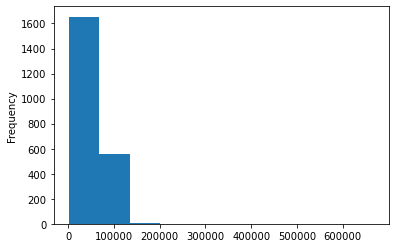

In [39]:
df['Income'].plot(kind = 'hist')


Распределения на различные типы продуктов очень схожи между собой.

<AxesSubplot:ylabel='Frequency'>

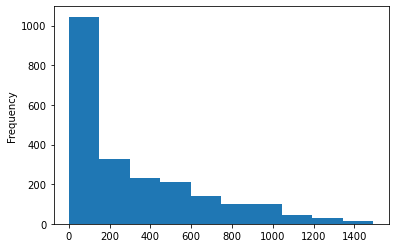

In [40]:
#check how much purchusing product categories
df['MntWines'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

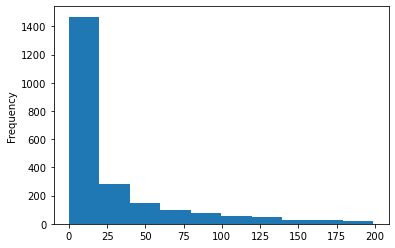

In [41]:
df['MntFruits'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

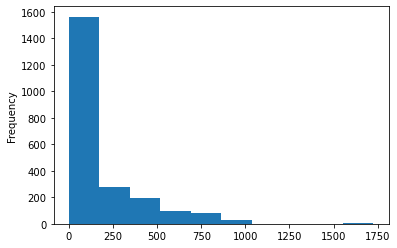

In [42]:
df['MntMeatProducts'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

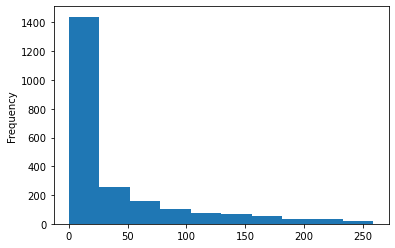

In [43]:
df['MntFishProducts'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

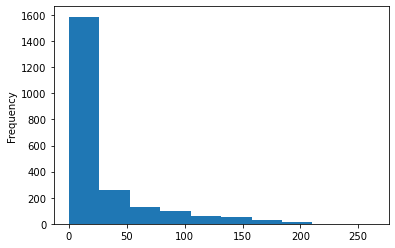

In [44]:
df['MntSweetProducts'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

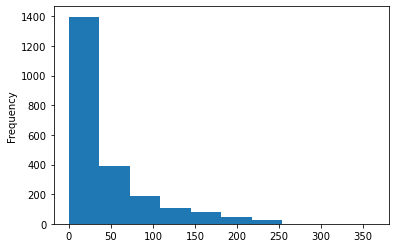

In [45]:
df['MntGoldProds'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

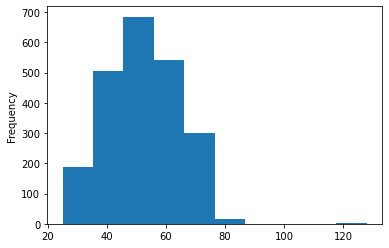

In [46]:
df['Age'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

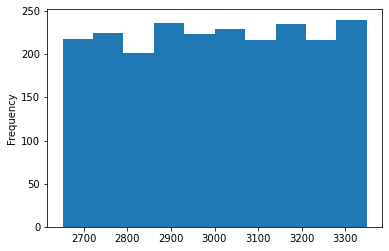

In [47]:
df['CustomerDayLong'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

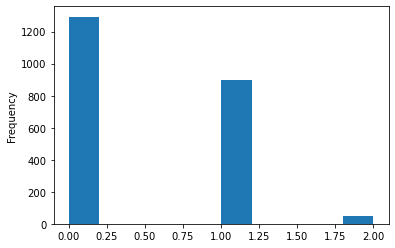

In [48]:
df['Kidhome'].plot(kind = 'hist') 

<AxesSubplot:ylabel='Frequency'>

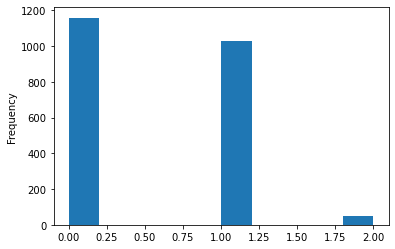

In [49]:
df['Teenhome'].plot(kind = 'hist')

<AxesSubplot:>

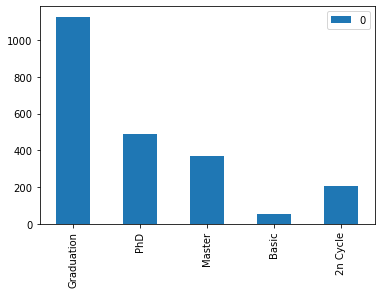

In [50]:
from collections import Counter
letter_counts = Counter(df['Education'])
Education = pd.DataFrame.from_dict(letter_counts, orient='index')
Education.plot(kind='bar')

<AxesSubplot:>

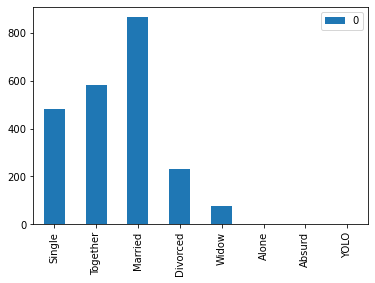

In [51]:
letter_counts = Counter(df['Marital_Status'])
Marital_Status = pd.DataFrame.from_dict(letter_counts, orient='index')
Marital_Status.plot(kind='bar')

## Statistics

In [52]:
# Dataset Statistics
df.describe()

ID         Income      Kidhome     Teenhome      Recency  \
count   2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821   52247.251354     0.444196     0.506250    49.109375   
std     3246.662198   25173.076661     0.538398     0.544538    28.962453   
min        0.000000    1730.000000     0.000000     0.000000     0.000000   
25%     2828.250000   35303.000000     0.000000     0.000000    24.000000   
50%     5458.500000   51381.500000     0.000000     0.000000    49.000000   
75%     8427.750000   68522.000000     1.000000     1.000000    74.000000   
max    11191.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
std           41.280498     52.167439           1.932238         2.778714   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth     Complain  \
count          2240.000000        2240.000000        2240.000000  2240.000000   
mean              2.662054           5.790179           5.316518     0.009375   
std               2.923101           3.250958           2.426645     0.096391   
min               0.000000           0.000000           0.000000     0.000000   
25%               0.000000           3.000000           3.000000     0.000000   
50%               2.000000           5.000000           6.000000     0.000000   
75%               4.000000           8.000000           7.000000     0.000000   
max              28.000000          13.000000          20.000000     1.000000   

       all_Response          Age  CustomerDayLong  
count   2240.000000  2240.000000      2240.000000  
mean       0.446875    52.194196      3004.582143  
std        0.890543    11.984069       202.122512  
min        0.000000    25.000000      2651.000000  
25%        0.000000    44.000000      2831.750000  
50%        0.000000    51.000000      3006.500000  
75%        1.000000    62.000000      3180.000000  
max        5.000000   128.000000      3350.000000

## Outliers

In [53]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [54]:
# Outliers
df = outliers(df)
df.describe()


ID         Income      Kidhome     Teenhome      Recency  \
count   2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821   51908.485943     0.444196     0.506250    49.109375   
std     3246.662198   21174.352162     0.538398     0.544538    28.962453   
min        0.000000    1730.000000     0.000000     0.000000     0.000000   
25%     2828.250000   35303.000000     0.000000     0.000000    24.000000   
50%     5458.500000   51381.500000     0.000000     0.000000    49.000000   
75%     8427.750000   68522.000000     1.000000     1.000000    74.000000   
max    11191.000000  127766.481336     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.150735    25.650822       164.152927        36.899517   
std     334.058486    37.475567       213.517170        52.500756   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1313.727892   145.622533       844.096118       201.412385   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          26.403605     43.364761           2.276292         4.061466   
std           38.878520     49.759288           1.711848         2.649647   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          150.904442    200.524192           8.121713        12.420964   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth     Complain  \
count          2240.000000        2240.000000        2240.000000  2240.000000   
mean              2.635145           5.790179           5.297486     0.002799   
std               2.766575           3.250958           2.343171     0.028777   
min               0.000000           0.000000           0.000000     0.000000   
25%               0.000000           3.000000           3.000000     0.000000   
50%               2.000000           5.000000           6.000000     0.000000   
75%               4.000000           8.000000           7.000000     0.000000   
max              11.431356          13.000000          12.596453     0.298549   

       all_Response          Age  CustomerDayLong  
count   2240.000000  2240.000000      2240.000000  
mean       0.424309    52.146625      3004.582143  
std        0.802260    11.768185       202.122512  
min        0.000000    25.000000      2651.000000  
25%        0.000000    44.000000      2831.750000  
50%        0.000000    51.000000      3006.500000  
75%        1.000000    62.000000      3180.000000  
max        3.118505    88.146405      3350.000000

In [55]:
df.isnull().sum()

ID                      0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
all_Response            0
Age                     0
CustomerDayLong         0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

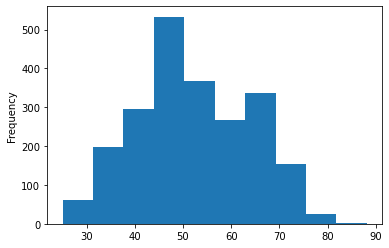

In [56]:
df['Age'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

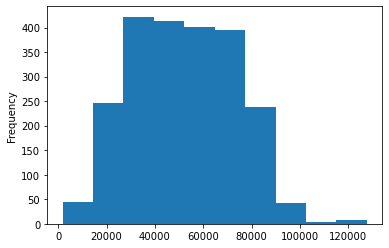

In [57]:
df['Income'].plot(kind = 'hist')

## Missing data

In [58]:
from sklearn.impute import SimpleImputer

'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''
#numeric
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Income']] = imputer_mean.fit_transform(df[['Income']]).round()

## Log

In [59]:
df = df.drop(df.columns[[0]], axis=1)

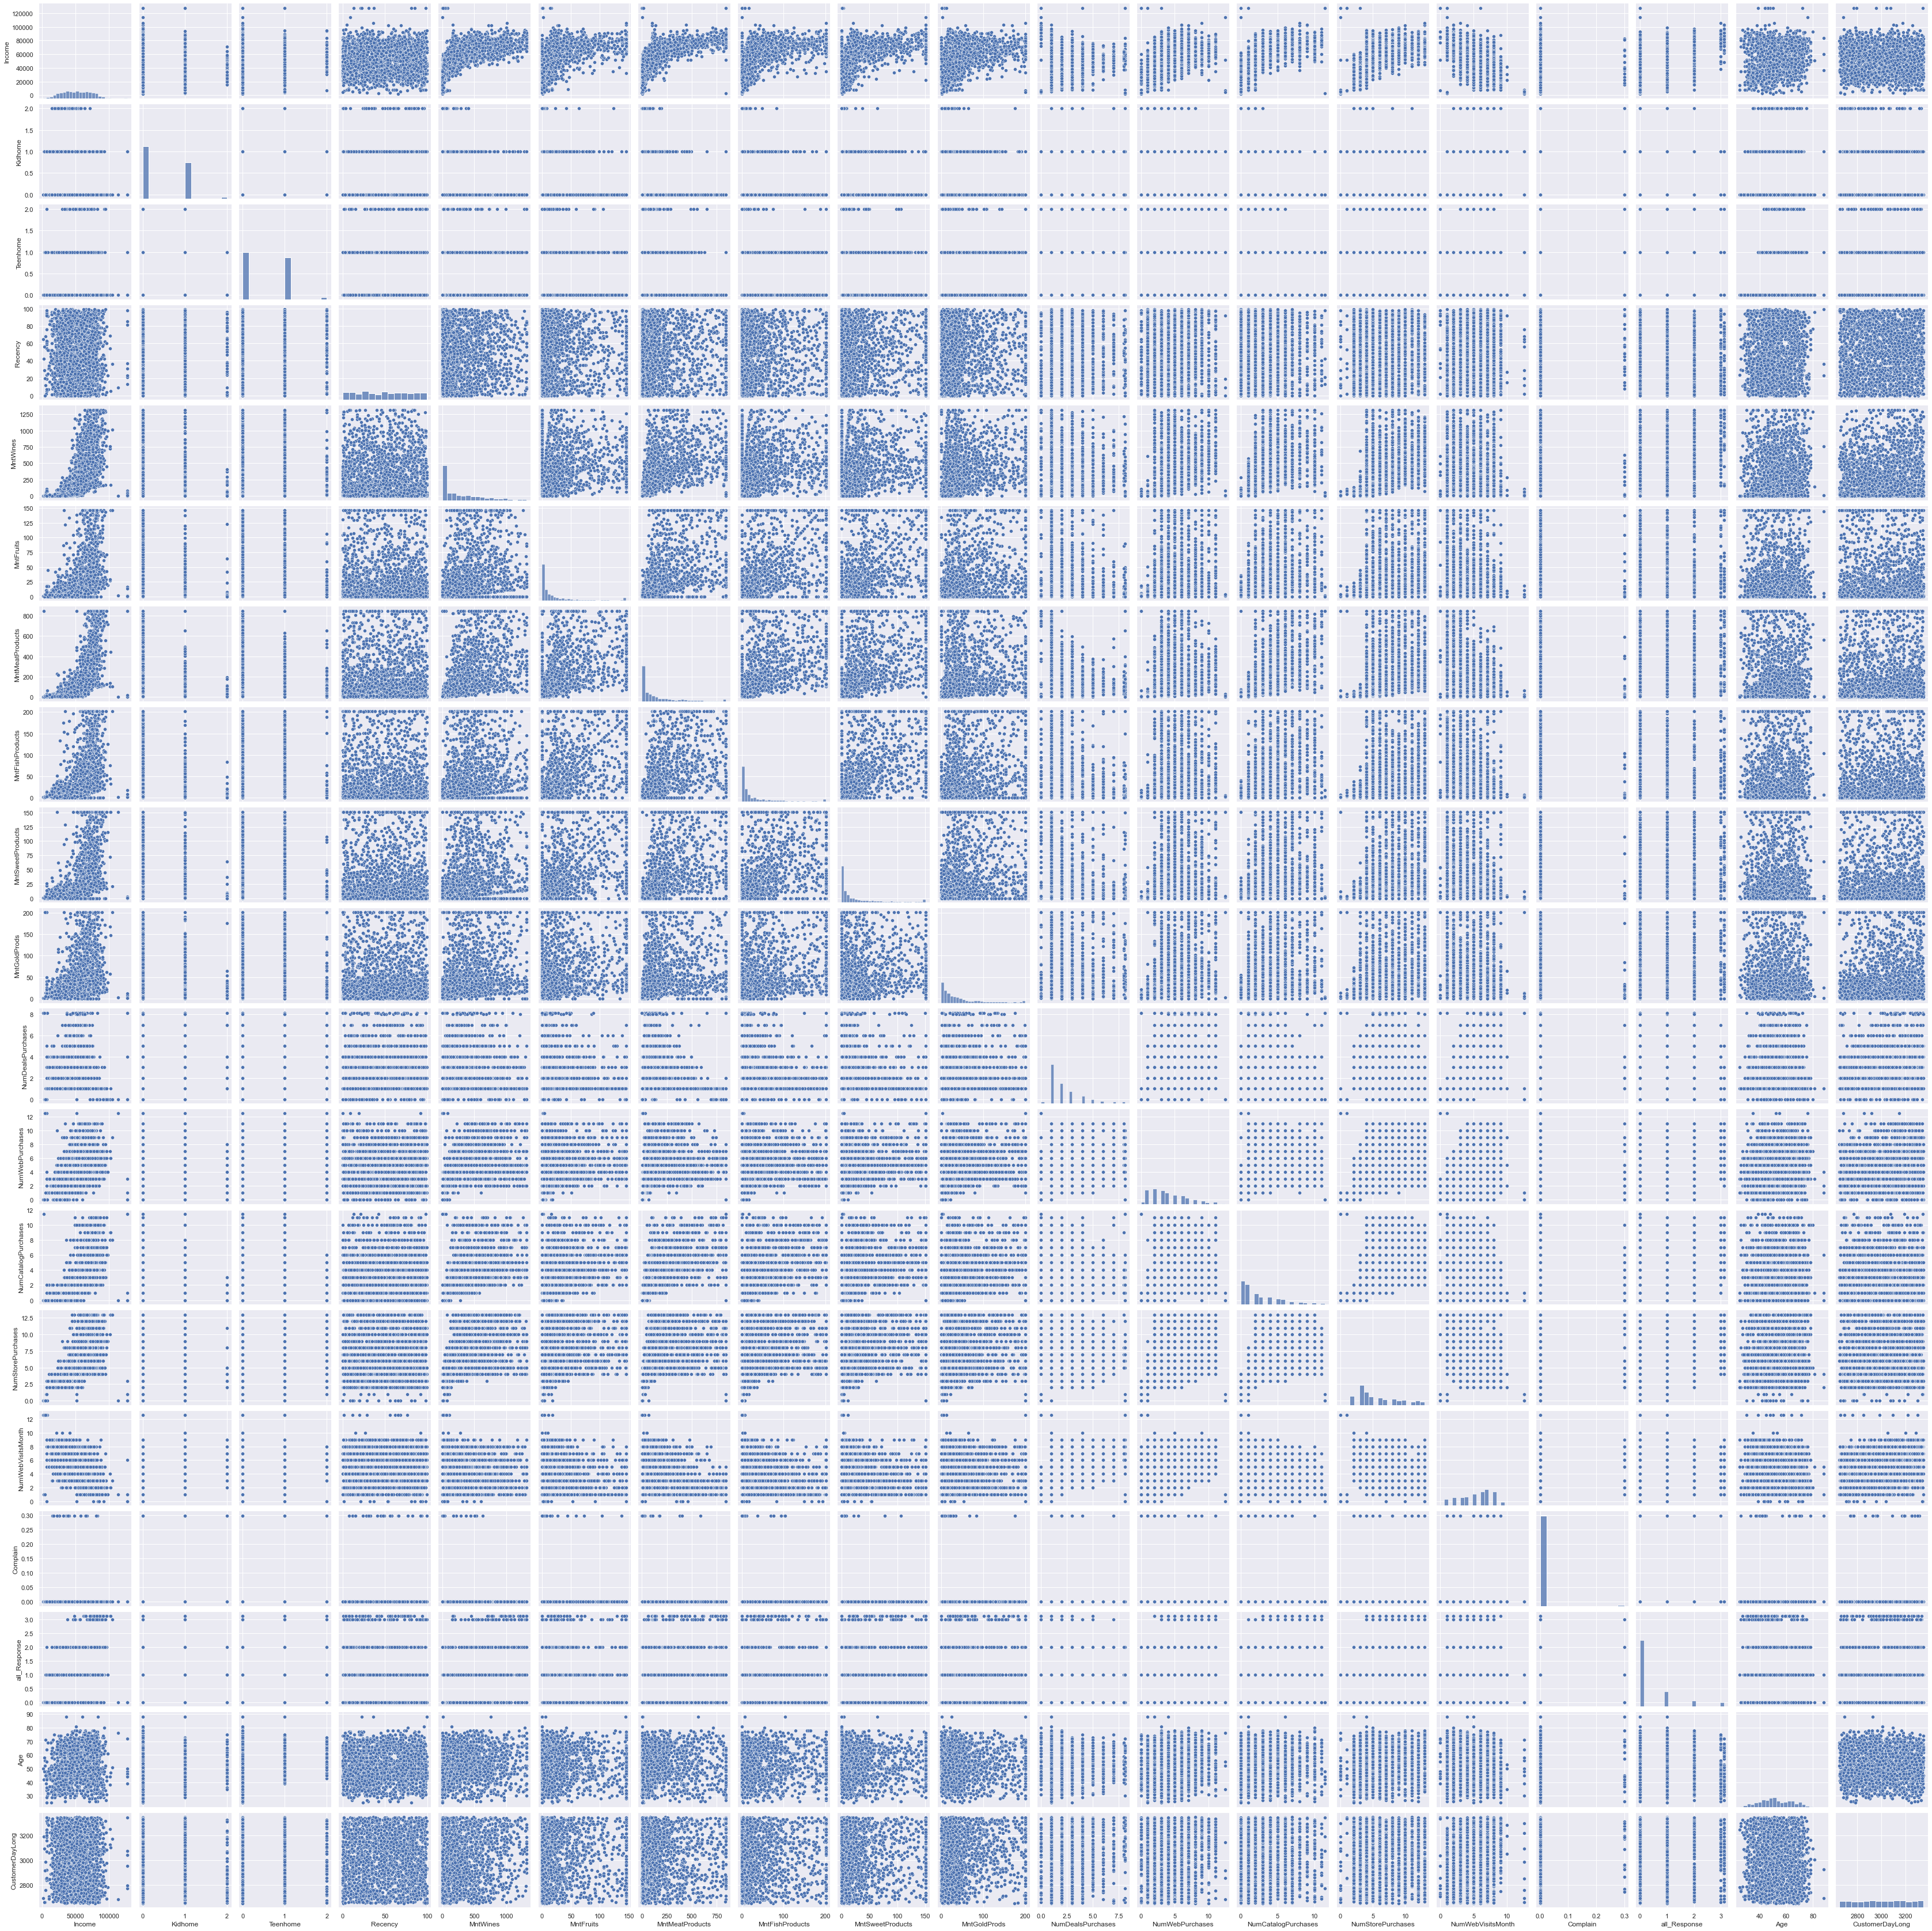

In [60]:
# Log Transformations for Skewed Distributions
#df[['m2', 'price']] = np.log(df[['m2', 'price']])

import seaborn as sns
sns.set()
sns.pairplot(df)

Графики закупки продуктов довольно схожи по виду в зависимости от дохода. 
Считаю, что их можно обьеденить ради облегчения анализа, но для сути исследования это не понесет никаких координальных изменений. Они в любом случае будут коррелировать и их придется исключить.

In [63]:
df['MNT'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df = df.drop(df.columns[[4,6,7,8,9,10,11]], axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   NumDealsPurchases    2240 non-null   float64
 6   NumWebPurchases      2240 non-null   float64
 7   NumCatalogPurchases  2240 non-null   float64
 8   NumStorePurchases    2240 non-null   int64  
 9   NumWebVisitsMonth    2240 non-null   float64
 10  Complain             2240 non-null   float64
 11  all_Response         2240 non-null   float64
 12  Age                  2240 non-null   float64
 13  CustomerDayLong      2240 non-null   int64  
 14  MNT                  2240 non-null   float64
dtypes: float64(9), int64(4), object(2)
mem

## Encoding

In [65]:
# Encoding categorical data
from sklearn import preprocessing
df['Education'] = preprocessing.LabelEncoder().fit_transform(df['Education'])

In [66]:
df['Marital_Status'] = preprocessing.LabelEncoder().fit_transform(df['Marital_Status'])
df

Education  Marital_Status   Income  Kidhome  Recency  NumDealsPurchases  \
0             2               4  58138.0        0       58                3.0   
1             2               4  46344.0        1       38                2.0   
2             2               5  71613.0        0       26                1.0   
3             2               5  26646.0        1       26                2.0   
4             4               3  58293.0        1       94                5.0   
...         ...             ...      ...      ...      ...                ...   
2235          2               3  61223.0        0       46                2.0   
2236          4               5  64014.0        2       56                7.0   
2237          2               2  56981.0        0       91                1.0   
2238          3               5  69245.0        0        8                2.0   
2239          4               3  52869.0        1       40                3.0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                 8.0                 10.0                  4   
1                 1.0                  1.0                  2   
2                 8.0                  2.0                 10   
3                 2.0                  0.0                  4   
4                 5.0                  3.0                  6   
...               ...                  ...                ...   
2235              9.0                  3.0                  4   
2236              8.0                  2.0                  5   
2237              2.0                  3.0                 13   
2238              6.0                  5.0                 10   
2239              3.0                  1.0                  4   

      NumWebVisitsMonth  Complain  all_Response   Age  CustomerDayLong  \
0                   7.0       0.0           1.0  64.0             3314   
1                   5.0       0.0           0.0  67.0             2764   
2                   4.0       0.0           0.0  56.0             2963   
3                   6.0       0.0           0.0  37.0             2790   
4                   5.0       0.0           0.0  40.0             2812   
...                 ...       ...           ...   ...              ...   
2235                5.0       0.0           0.0  54.0             3032   
2236                7.0       0.0           1.0  75.0             2670   
2237                6.0       0.0           1.0  40.0             2806   
2238                3.0       0.0           0.0  65.0             2807   
2239                7.0       0.0           1.0  67.0             3273   

              MNT  
0     1617.000000  
1       27.000000  
2      776.000000  
3       53.000000  
4      422.000000  
...           ...  
2235  1294.524192  
2236   444.000000  
2237  1241.000000  
2238   843.000000  
2239   172.000000  

[2240 rows x 15 columns]

## Correlations

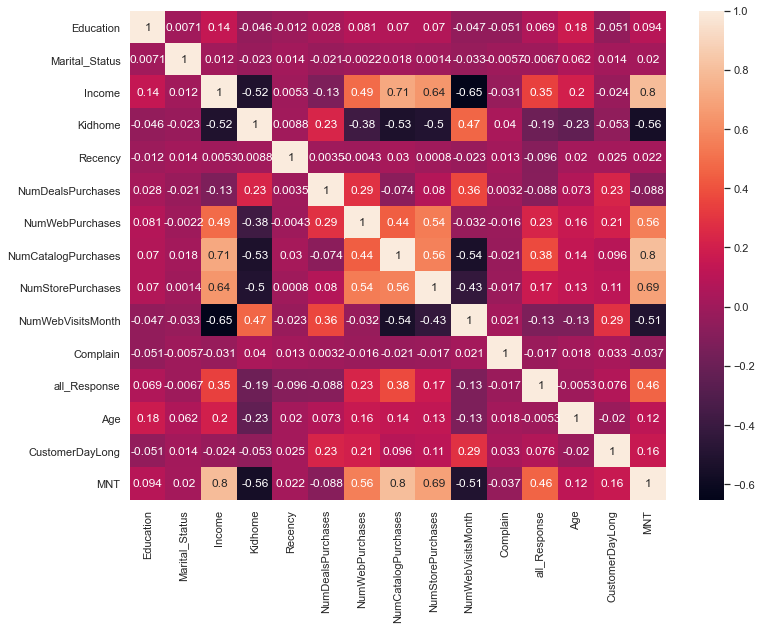

In [67]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

## Exporting

In [68]:
# Exporting the dataset
df.to_csv('market_prep.csv', sep=';', index=False)